In [13]:
import os
import time
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mimg
from torchvision import datasets, models, transforms
import torch.nn.functional as F
import torchvision 
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import models
from torchvision import datasets, models, transforms
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import HDBSCAN
from PIL import Image


In [2]:
f = open('./mse_vae321.csv').read().split('\n')[:-1]
f = np.array([float(i[i.find('(')+1:i.find(',')]) for i in f])

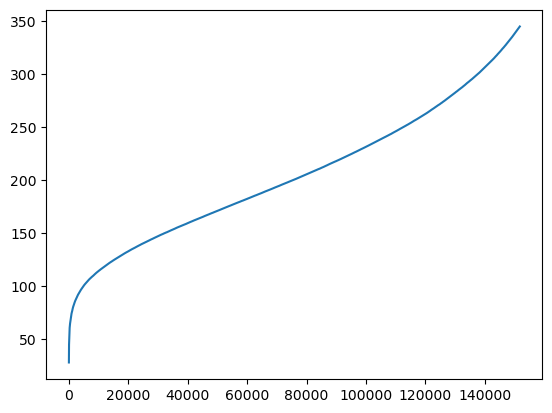

In [3]:
### list for sorting all imagess by a quality of reconstruction 
### adding to list another list with numberst from 0 to a lenght of img array 

ff = np.append(np.arange(len(f)).reshape(1,-1), f.reshape(1,-1),axis=0).T.tolist()
ff.sort(key = lambda x:x[1])

plt.plot(np.arange(len(ff[:len(ff)//100*85])),np.array(ff).T[1][:len(ff)//100*85])

### list of indexes of images not being outlayers
ff = ff[:len(ff)//100*85]

In [4]:
i=10
len(f[(f>=i) + (f<(i+10))])

178688

<BarContainer object of 198 artists>

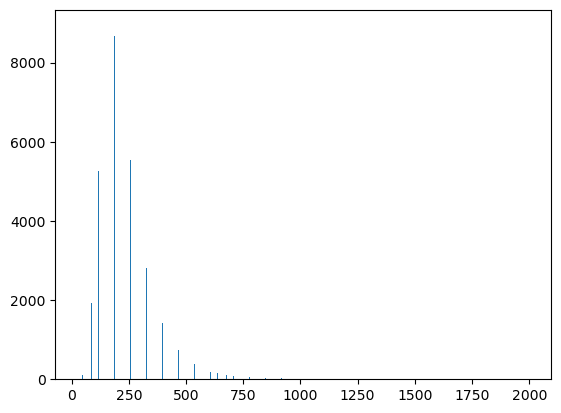

In [5]:
plt.bar(list(range(int(f.min()),int(f.max()),10)),
[len(f[(f>=i) * (f<(i+10))]) for i in range(int(f.min()),int(f.max()),10)])

In [6]:
### list with embeddings 

emb = open('./bottleneck_vae321.csv').read()
emb = np.array([i[1:-1].split(', ') for i in emb.split('\n')[:-1]]).astype(float)

### list with embeddings without outlayers  
# emb = emb[np.array(ff).T[0].astype(int)]

In [7]:
f2 = open('/home/michal/data/data/celeba/list_attr_celeba.txt').read()
# f2.split('\n')[1].split(' ').index('Smiling')
ff2 = np.array([np.array(i.split(' '))[np.array(i[10:].split(' '))!=''] for i in f2.split('\n')[2:-1]]).astype(int)

In [8]:
l = f<151
# l = np.array(ff).T[0].astype(int)
np.array(ff2[:len(l),31])[l]

array([-1,  1,  1, ...,  1, -1,  1])

In [9]:
batch_size = 128
num_workers = 4

transform = transforms.Compose([transforms.ToTensor(),                                
                                # transforms.Normalize(mean=[0.5], std=[0.5]),
                                transforms.Resize(size=[int(218/2), int(178/2)]),
                                # transforms.RandomHorizontalFlip(p=0.5),
                                transforms.CenterCrop((64,64))])

data_path = '~/data/data/celeba/train_celeba'

dataset = ImageFolder(data_path, transform)
train_loader = DataLoader(dataset=dataset,
                          batch_size=batch_size,
                          # num_workers=num_workers,
                          # sampler = l,
                        #   shuffle=True,
                        sampler = 
                          drop_last=True)


/home/michal/anaconda3/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/tmp/ipykernel_387/1530926710.py:4: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim -

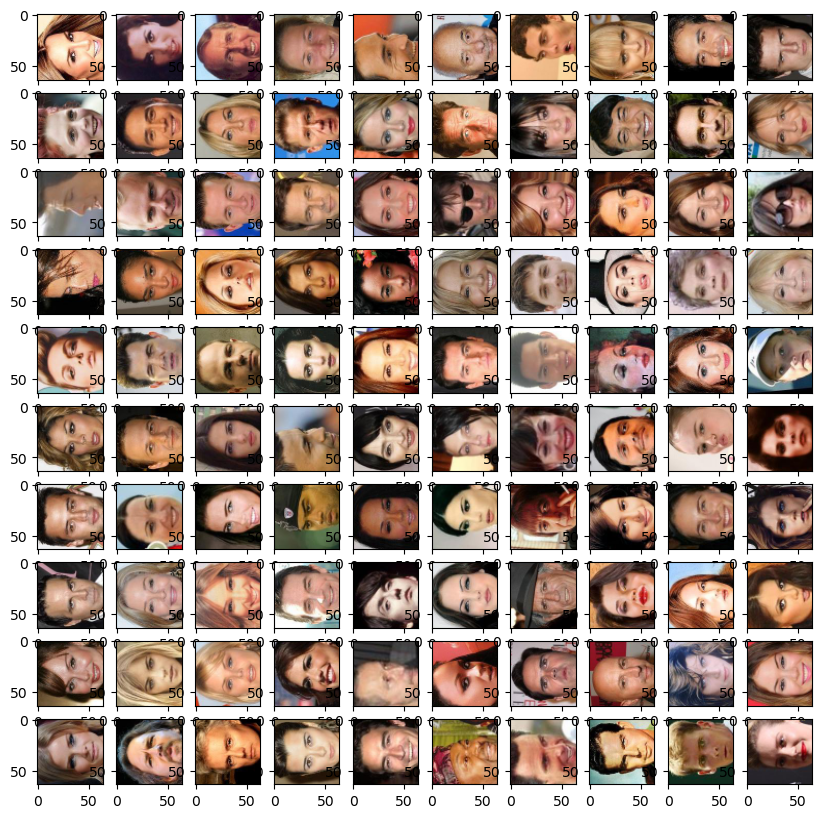

In [10]:
fig, ax = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        ax[i,j].imshow(next(iter(train_loader))[0][i+10*j].T)

In [33]:
def avg_faces(train_loader, labels,labels1):    

    x1 = torch.zeros((next(iter(train_loader))[0].size()[1:]))
    x2 = torch.zeros((next(iter(train_loader))[0].size()[1:]))
    
    for batch_idx, (features, _) in enumerate(train_loader):
        print(batch_idx)
        
        lbl = labels[batch_idx*features.size(0):(batch_idx+1)*features.size(0)]
        lbl1 = labels1[batch_idx*features.size(0):(batch_idx+1)*features.size(0)]
        
        temp=features[(lbl==1)*lbl1]
        if len(temp)!=0:
            x1+=temp.sum(axis=0)
            x1/=len(temp)
        
        temp=features[(lbl!=1)*lbl1]
        if len(temp)!=0:
            x2+=temp.sum(axis=0)
            x2/=len(temp)
        

    return x1,x2

In [29]:
f2.split('\n')[1].split( ).index('Male')

20

In [26]:
len(f[(ff2[:,31]==1)[:len(f)]*(f<151)])

17492

In [34]:
x1,x2 = avg_faces(train_loader=train_loader, labels=np.array(ff2[:,20]), labels1= (f<151))

/home/michal/anaconda3/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [15]:
fm = ff2[:,f2.split('\n')[1].split(' ').index('Male')]==-1

In [16]:
len(fm[(np.array(ff2[:,31])==1)*fm])
# [:len(f)]*(f<151)

63871

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


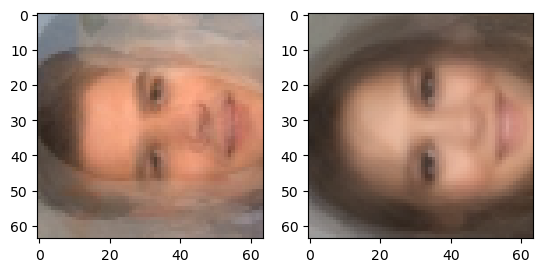

In [35]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(x1.numpy().T)
ax[1].imshow(x2.numpy().T)

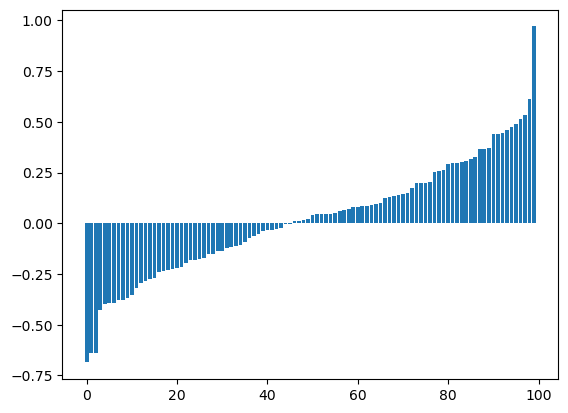

In [18]:
smile = emb[(ff2[:len(emb)][:,31]==1)*(f<151)]
nsmile = emb[(ff2[:len(emb)][:,31]!=1)*(f<151)]
diff = nsmile.mean(axis=0)-smile.mean(axis=0)
diff_sort = diff
diff_sort.sort()
plt.bar(np.arange(len(diff)),diff)
diff = torch.tensor(diff)

In [19]:
def block_down(inc,outc,mid_big=False,kern_size_desc=True):
    
    mid = 0
    if mid_big: mid=outc
    else: mid=inc

    if kern_size_desc:
        c1 = nn.Conv2d(inc,mid,4,2,1)
        c2 = nn.Conv2d(mid,outc,3,1,1)
        
    else:
        c1 = nn.Conv2d(inc,mid,3,1,1)
        c2 = nn.Conv2d(mid,outc,4,2,1)
        
    return nn.Sequential(
        c1,
        nn.BatchNorm2d(mid),
        nn.LeakyReLU(),
        c2,
        nn.BatchNorm2d(outc),
        nn.LeakyReLU(),
        )

def block_up(inc,outc,mid_big=True,kern_size_desc=False):
    
    mid = 0
    if mid_big: mid=outc
    else: mid=inc
    
    if kern_size_desc:
        c1 = nn.ConvTranspose2d(inc,mid,4,2,1)
        c2 = nn.ConvTranspose2d(mid,outc,3,1,1)
        
    else:
        c1 = nn.ConvTranspose2d(inc,mid,3,1,1)
        c2 = nn.ConvTranspose2d(mid,outc,4,2,1)
        
    
    return nn.Sequential(
        c1,
        nn.BatchNorm2d(mid),
        nn.LeakyReLU(),
        c2,
        nn.BatchNorm2d(outc),
        nn.LeakyReLU(),
        )


In [20]:
##########################
### MODEL
##########################

class VAE1(torch.nn.Module):

    def __init__(self, latent_dim=100, ae_shape=None):
        
        super().__init__()
        self.latent_dim = latent_dim
        self.arr = [[2**i,2**(i+1)] for i in range(6,11-2)]
        if ae_shape==None:
            self.enc_shape = [[True,False]]*4
        else:
            self.enc_shape = ae_shape
        # if dec_shape==None:
        #     self.dec_shape = [[False,True][::-1]]*4
        #encoder
        self.enc = nn.Sequential()
        for j,i in enumerate(self.arr):
            self.enc.add_module(
                module=block_down(i[0],i[1],self.enc_shape[j][0],self.enc_shape[j][1]),name=str(j))

        #decoder
        self.dec = nn.Sequential()
        for j,i in enumerate(self.arr[::-1]):
            self.dec.add_module(
                module=block_up(i[1],i[0],not(self.enc_shape[j][0]),not(self.enc_shape[j][1])),name=str(j))
        
            
            
        self.encoder = nn.Sequential(
            nn.Conv2d(3,self.arr[0][0],3,1,1),
            self.enc,
            nn.Conv2d(self.arr[-1][1],latent_dim,2,1,0),
        )
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(latent_dim,self.arr[-1][1],2,1,0),
            self.dec,
            nn.ConvTranspose2d(self.arr[0][0],3,3,1,1),
        )
        
        self.z_mean = torch.nn.Linear(latent_dim,latent_dim)
        # .to('cuda:0')
        self.z_log_var = torch.nn.Linear(latent_dim,latent_dim)
        # .to('cuda:0')

    def encoding_fn(self, x):
        x = self.encoder(x)
        z_mean, z_log_var = self.z_mean(x), self.z_log_var(x)
        encoded = self.reparameterize(z_mean, z_log_var)
        return encoded

        
    def reparameterize(self, z_mu, z_log_var):
        eps = torch.randn(z_mu.size(0), z_mu.size(1)).to('cuda:0')
        z = z_mu + eps * torch.exp(z_log_var/2.)
        return z
        
        
    def forward(self, x):
        x = self.encoder(x)
        x = x.reshape(x.size(0),1,1,x.size(1))
        z_mean, z_log_var = self.z_mean(x), self.z_log_var(x)
        x = x.reshape(x.size(0),x.size(3),1,1)
        encoded = self.reparameterize(z_mean, z_log_var)
        decoded = self.decoder(x)
        return encoded, z_mean, z_log_var, decoded


In [21]:
##########################
### MODEL
##########################

class VAE2(torch.nn.Module):

    def __init__(self, ae_shape=None, vae1 = None, latent_dim=100):
        
        super().__init__()
        if ae_shape==None:
            self.enc_shape = [[True,False]]
        else:
            self.enc_shape = ae_shape

        if vae1==None:
            self.vae1 = VAE1()
            
        else:
            self.vae1 = vae1

        self.arr = self.vae1.arr[0][0]
        self.arr1 = self.vae1.arr[-1][1]
        #encoder
        j=0
        self.enc = block_down(self.arr//2,self.arr,self.enc_shape[j][0],self.enc_shape[j][1])
        self.enc = nn.Sequential(
            self.enc,
            self.vae1.enc)
        #decoder
        self.dec = block_up(self.arr,self.arr//2,not(self.enc_shape[j][0]),not(self.enc_shape[j][1]))
        self.dec = nn.Sequential(
            self.vae1.dec,
            self.dec)
            
            
        self.encoder = nn.Sequential(
            nn.Conv2d(3,self.arr//2,3,1,1),
            self.enc,
            nn.Conv2d(self.arr1,latent_dim,2,1,0),
        )
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(latent_dim,self.arr1,2,1,0),
            self.dec,
            nn.ConvTranspose2d(self.arr//2,3,3,1,1),
        )
        
        self.z_mean = self.vae1.z_mean
        # .to('cuda:0')
        self.z_log_var = self.vae1.z_log_var 
        # .to('cuda:0')

    def encoding_fn(self, x):
        x = self.encoder(x)
        z_mean, z_log_var = self.z_mean(x), self.z_log_var(x)
        encoded = self.reparameterize(z_mean, z_log_var)
        return encoded

        
    def reparameterize(self, z_mu, z_log_var):
        eps = torch.randn(z_mu.size(0), z_mu.size(1)).to('cuda:0')
        z = z_mu + eps * torch.exp(z_log_var/2.)
        return z
        
        
    def forward(self, x):
        x = self.encoder(x)
        x = x.reshape(x.size(0),1,1,x.size(1))
        z_mean, z_log_var = self.z_mean(x), self.z_log_var(x)
        x = x.reshape(x.size(0),x.size(3),1,1)
        encoded = self.reparameterize(z_mean, z_log_var)
        decoded = self.decoder(x)
        return encoded, z_mean, z_log_var, decoded


In [22]:
##########################
### MODEL
##########################

class VAE3(torch.nn.Module):

    def __init__(self, ae_shape=None, vae1 = None, latent_dim=100):
        
        super().__init__()
        if ae_shape==None:
            self.enc_shape = [[True,False]]
        else:
            self.enc_shape = ae_shape

        if vae1==None:
            self.vae1 = VAE2()
            
        else:
            self.vae1 = vae1

        self.arr = self.vae1.arr//2
        self.arr1 = self.vae1.arr1
        #encoder
        j=0
        self.enc = block_down(self.arr//2,self.arr,self.enc_shape[j][0],self.enc_shape[j][1])

        #decoder
        self.dec = block_up(self.arr,self.arr//2,not(self.enc_shape[j][0]),not(self.enc_shape[j][1]))
            
            
        self.encoder = nn.Sequential(
            nn.Conv2d(3,self.arr//2,3,1,1),
            self.enc,
            self.vae1.enc,
            nn.Conv2d(self.arr1,latent_dim,2,1,0),
        )
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(latent_dim,self.arr1,2,1,0),
            self.vae1.dec,
            self.dec,
            nn.ConvTranspose2d(self.arr//2,3,3,1,1),
        )
        
        self.z_mean = self.vae1.z_mean
        # .to('cuda:0')
        self.z_log_var = self.vae1.z_log_var 
        # .to('cuda:0')

    def encoding_fn(self, x):
        x = self.encoder(x)
        z_mean, z_log_var = self.z_mean(x), self.z_log_var(x)
        encoded = self.reparameterize(z_mean, z_log_var)
        return encoded

        
    def reparameterize(self, z_mu, z_log_var):
        eps = torch.randn(z_mu.size(0), z_mu.size(1)).to('cuda:0')
        z = z_mu + eps * torch.exp(z_log_var/2.).to('cuda:0')
        return z
        
        
    def forward(self, x):
        x = self.encoder(x)
        x = x.reshape(x.size(0),1,1,x.size(1))
        enc = x
        z_mean, z_log_var = self.z_mean(x), self.z_log_var(x)
        x = x.reshape(x.size(0),x.size(3),1,1)
        encoded = self.reparameterize(z_mean, z_log_var)
        decoded = self.decoder(x)
        return encoded, z_mean, z_log_var, decoded, enc


/home/michal/anaconda3/lib/python3.10/site-packages/torch/_tensor.py:775: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


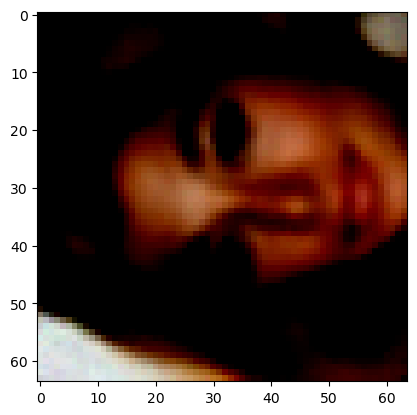

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


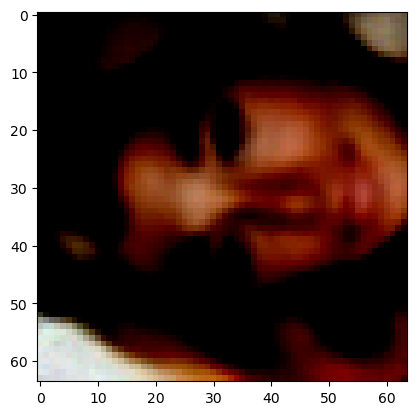

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


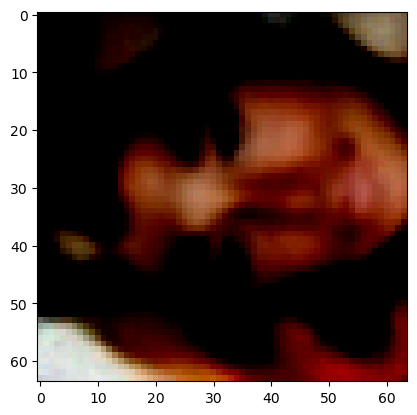

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


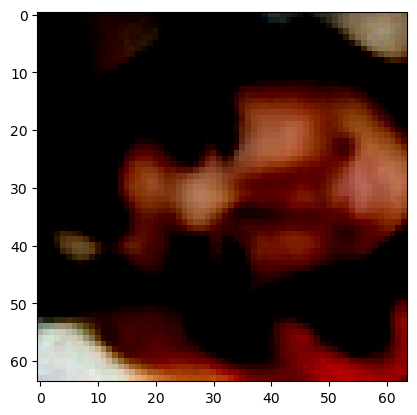

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


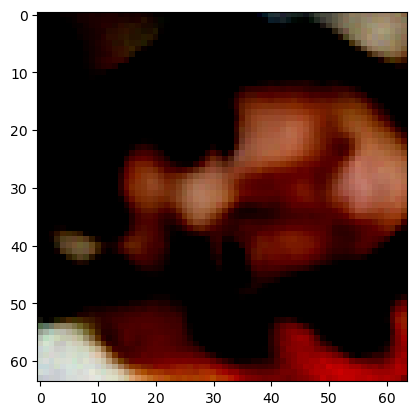

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


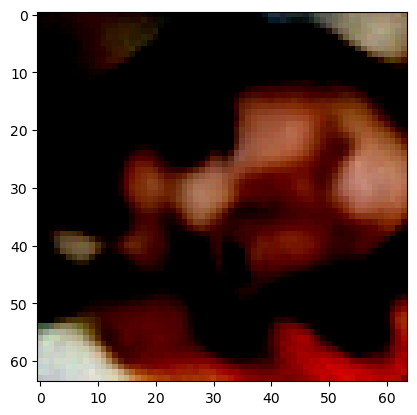

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


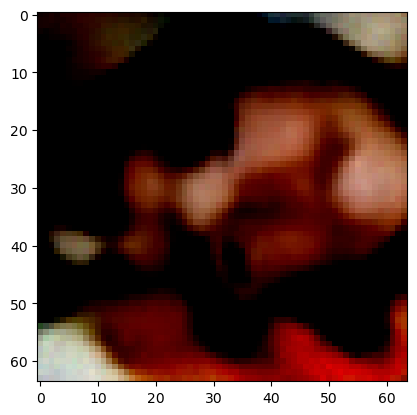

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


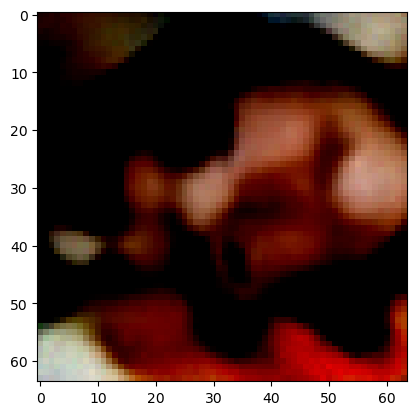

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


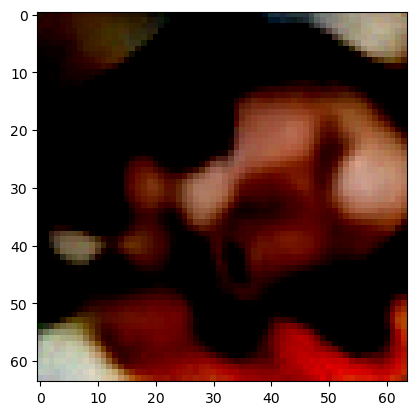

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


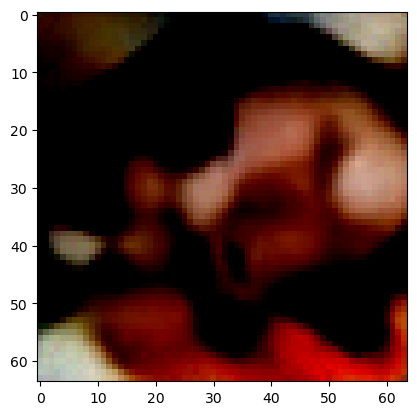

tensor([ 16.0174,  15.1846,  13.6770,  ..., -11.9884, -12.5910, -19.1645],
       dtype=torch.float64)


In [23]:
# x = torch.tensor(emb[:128]).view(128,100,1,1)
model = VAE3().type(torch.float64)
model.load_state_dict(torch.load('./vae321_fat_14e.pt'))
x = torch.tensor(emb[:128]).view(128,100,1,1)
xx = x
xx = xx-diff.resize(1,100,1,1)
temp = model.decoder(xx)[5].detach().numpy().T

for i in range(10):
    xx = xx-2*diff.resize(1,100,1,1)
    plt.imshow(model.decoder(xx)[5].detach().numpy().T)
    plt.show()

print(xx.reshape(-1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

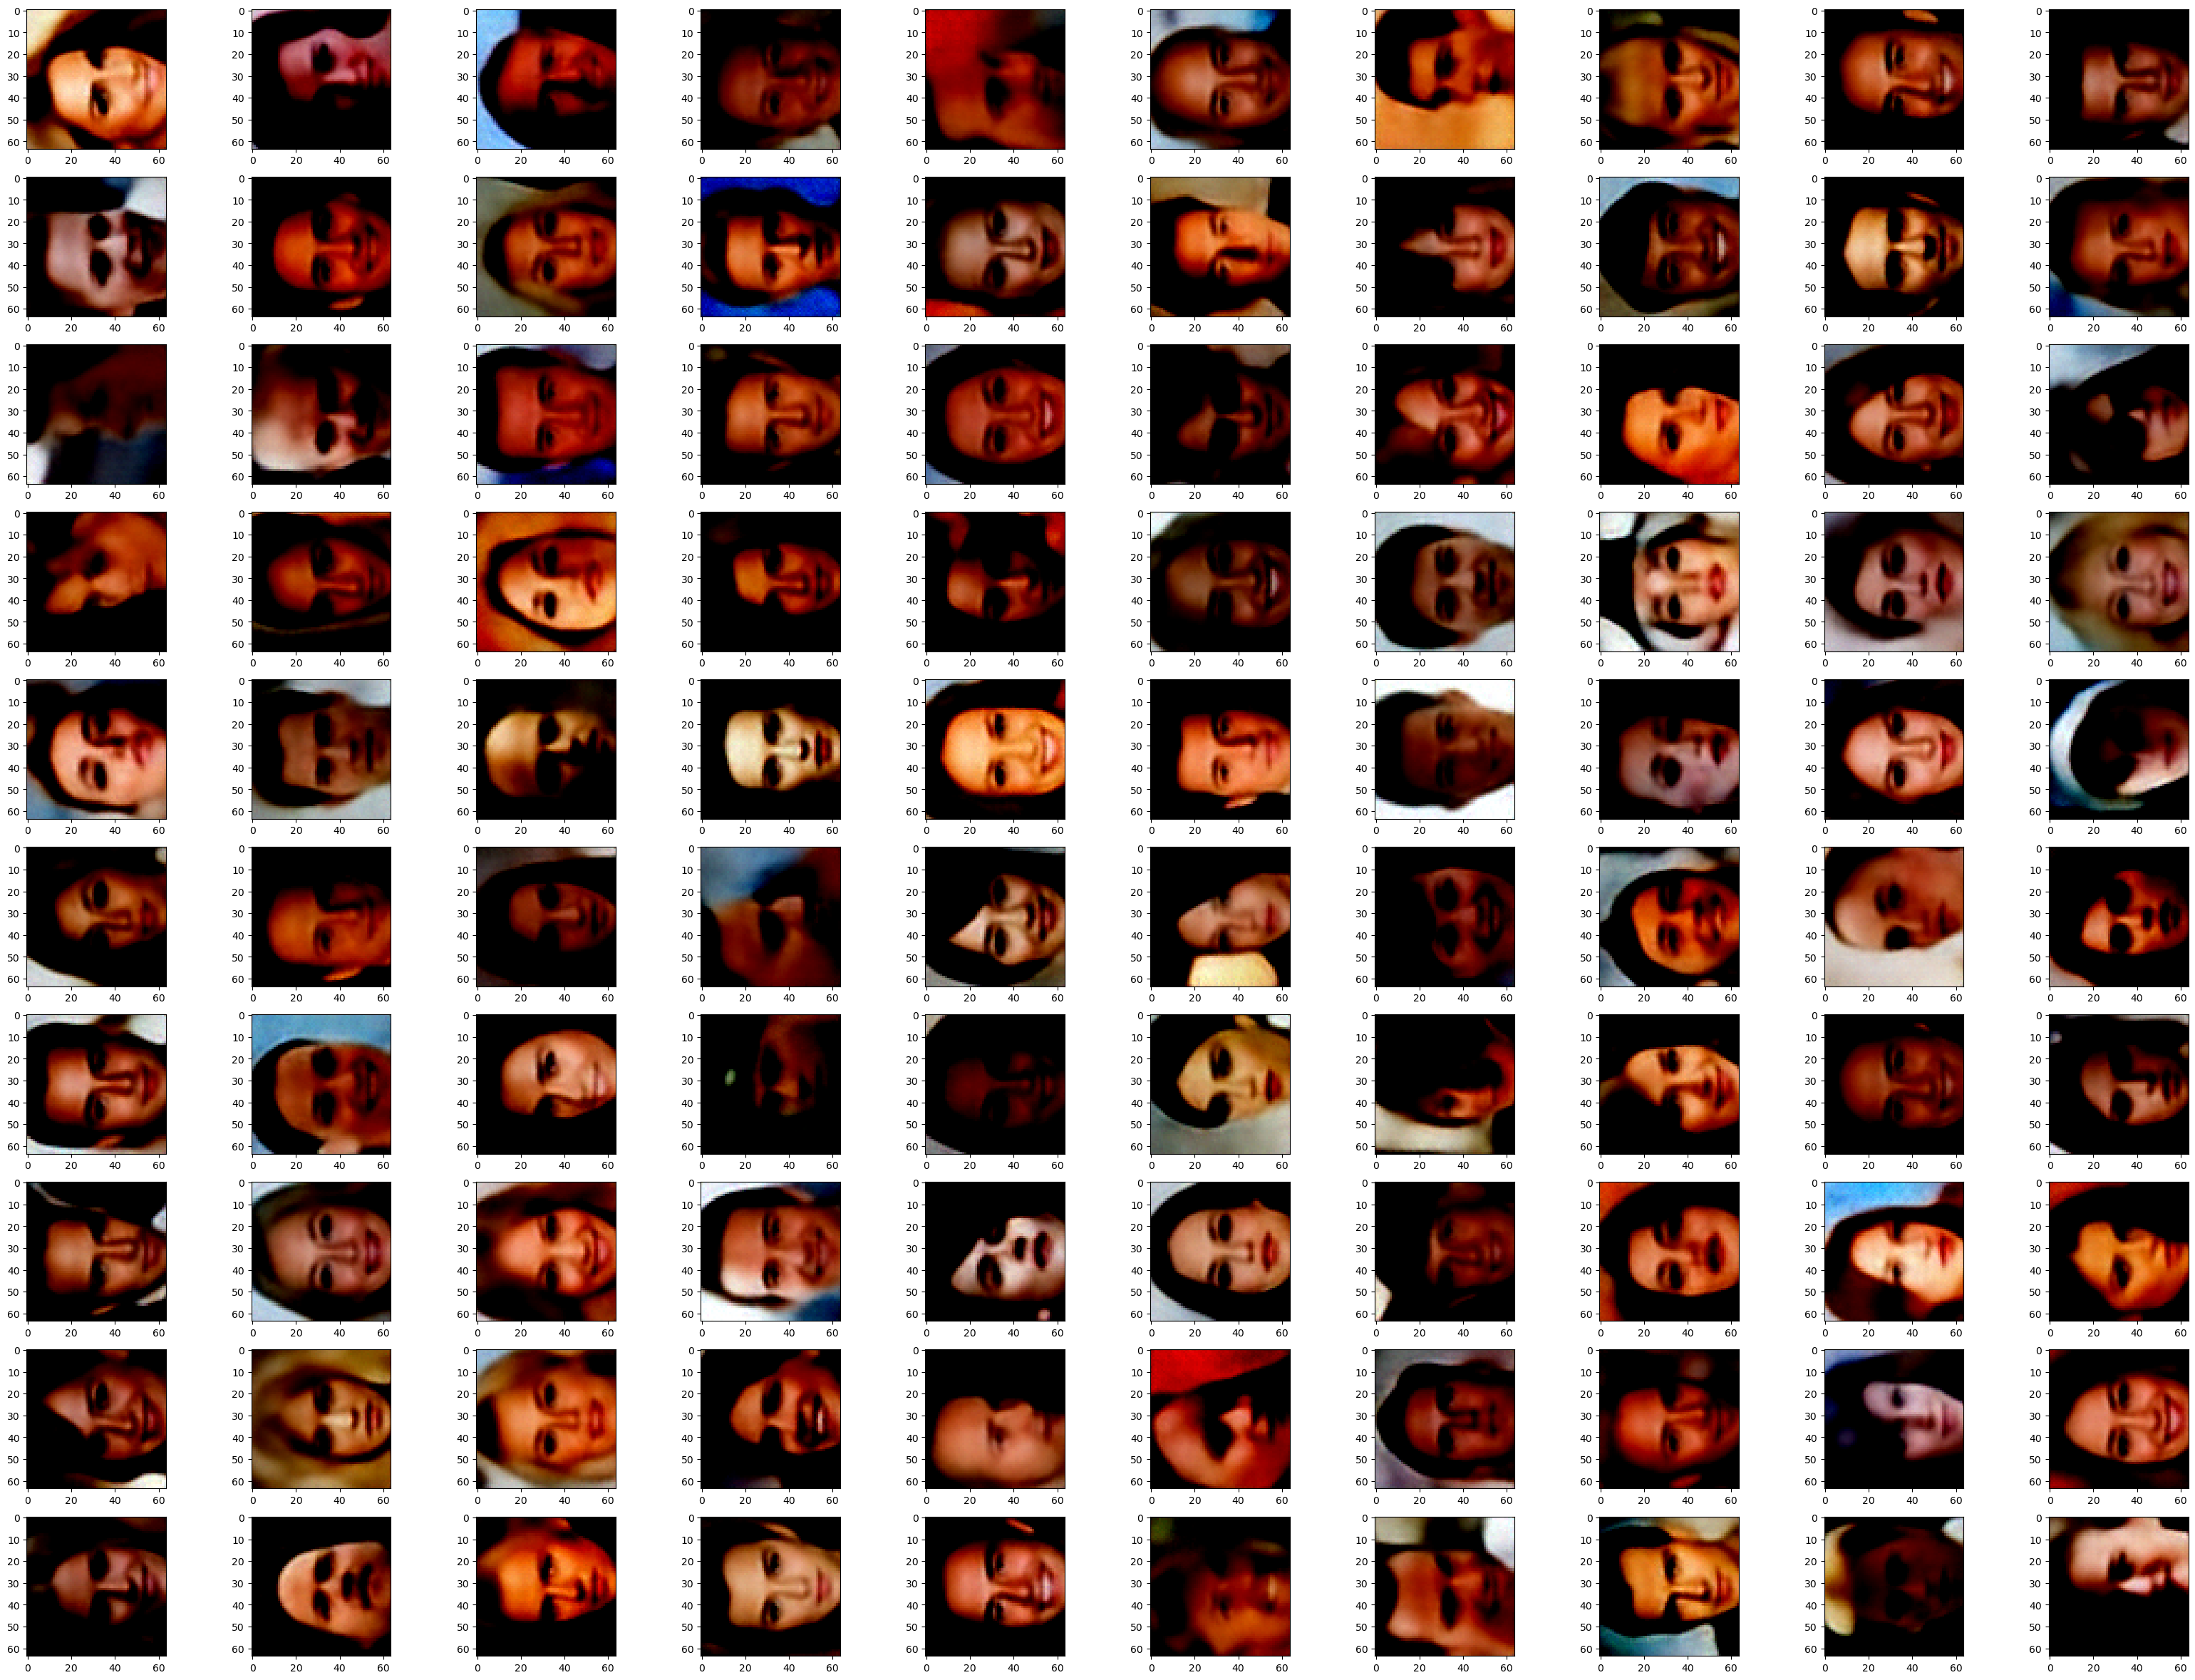

In [24]:
img = model.decoder(x)
fig, ax  = plt.subplots(10,10, figsize=(40,30))
for i in range(10):
    for j in range(10):
        ax[i,j].imshow(img[i+10*j].detach().numpy().T)


In [25]:
model.decoder(model.encoder(
model.decoder(torch.tensor(emb[[10]]).reshape(1,100,1,1))))

tensor([[[[ 7.9043e-01,  7.6594e-01,  8.3235e-01,  ...,  7.6908e-01,
            8.9958e-01,  8.1039e-01],
          [ 7.5023e-01,  7.9531e-01,  8.0339e-01,  ...,  6.5868e-01,
            8.1961e-01,  8.7740e-01],
          [ 7.5887e-01,  7.6184e-01,  7.6312e-01,  ...,  4.8803e-01,
            7.6459e-01,  8.6357e-01],
          ...,
          [-2.6479e-01, -2.3102e-01, -9.9619e-02,  ..., -7.2945e-01,
           -7.5321e-01, -7.5666e-01],
          [-2.0240e-01, -1.3993e-01, -5.3865e-03,  ..., -7.5267e-01,
           -8.1378e-01, -7.4719e-01],
          [-1.4083e-01, -8.4750e-02,  5.1986e-04,  ..., -7.7838e-01,
           -7.7343e-01, -6.7336e-01]],

         [[ 8.0603e-01,  8.4013e-01,  8.0962e-01,  ...,  6.2695e-01,
            6.7361e-01,  6.9686e-01],
          [ 8.4802e-01,  8.2722e-01,  7.9289e-01,  ...,  4.4721e-01,
            6.3793e-01,  6.8418e-01],
          [ 7.3519e-01,  8.1986e-01,  8.0118e-01,  ...,  1.9854e-01,
            5.5524e-01,  6.0853e-01],
          ...,
     

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/tmp/ipykernel_356/217479728.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imgs = model.decoder(torch.tensor(temp_emb).reshape(5,100,1,1))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for 

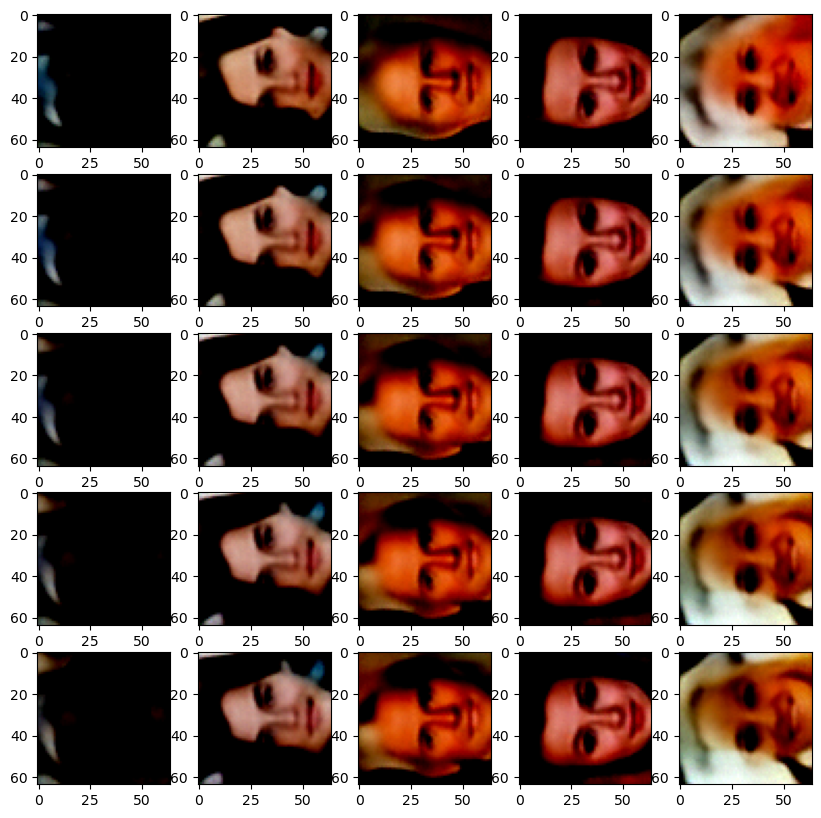

In [26]:
shuff_num_list = np.arange(len(emb))
np.random.shuffle(shuff_num_list)

fig, ax = plt.subplots(5,5,figsize=(10,10))

temp_emb = emb[shuff_num_list[:5]]
for i in range(10):
    imgs = model.decoder(torch.tensor(temp_emb).reshape(5,100,1,1))
    if i%2==0:
        for j in range(5):
            ax[i//2,j].imshow(imgs[j].T.detach().numpy())
        temp_emb = model.encoder(imgs) - diff.reshape(1,100,1,1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


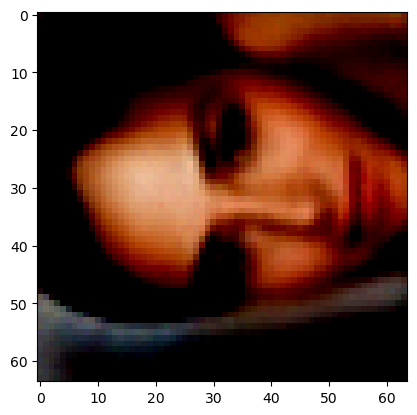

In [27]:
plt.imshow(model.decoder(torch.tensor(emb[13].reshape(1,100,1,1)))[0].detach().numpy().T)

In [28]:
def nghbs_list(c, l):
    return list(zip(np.arange(len(l)),[ sum(((c-i)**2).reshape(-1)) for i in l]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

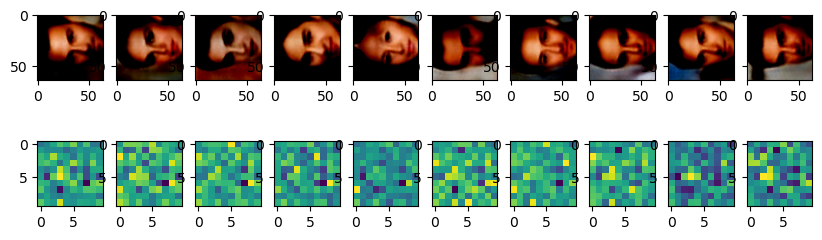

In [29]:
nl = nghbs_list(emb[13],emb)
nl.sort(key = lambda x:x[1])
fig, ax = plt.subplots(2,10,figsize=(10,3)) 
for j,i in enumerate(emb[np.array(nl[1:11]).T[0].astype(int)]):
    ax[0,j].imshow(model.decoder(torch.tensor(i.reshape(1,100,1,1)))[0].detach().numpy().T)
    ax[1,j].imshow((emb[11]-i).reshape(10,10))
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

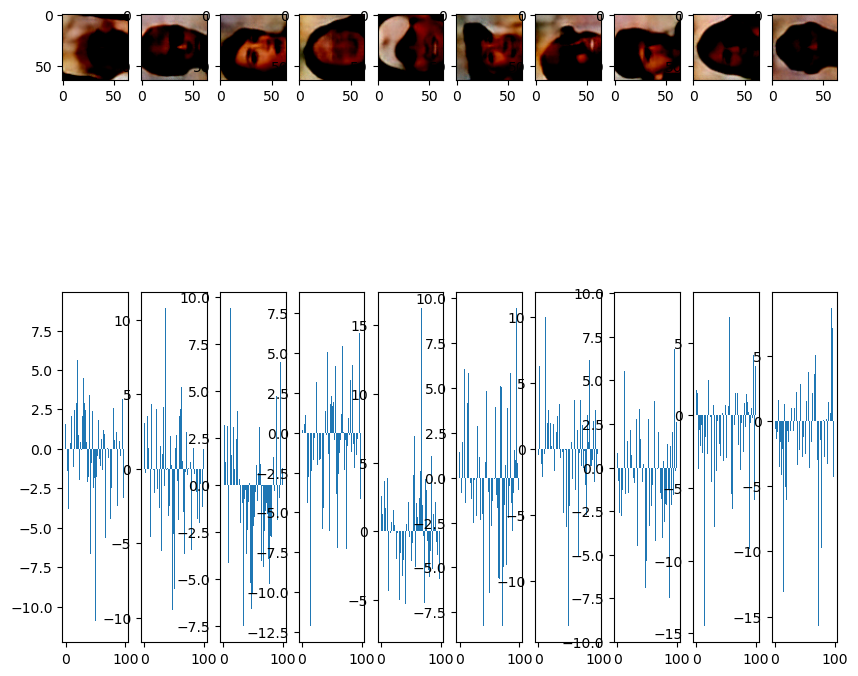

In [30]:
fig, ax = plt.subplots(2,10,figsize=(10,10)) 
for j,i in enumerate(emb[np.array(nl[-10:]).T[0].astype(int)]):
    ax[0,j].imshow(model.decoder(torch.tensor(i.reshape(1,100,1,1)))[0].detach().numpy().T)
    ax[1,j].bar(np.arange(100),emb[11]-i)
    

<BarContainer object of 1052 artists>

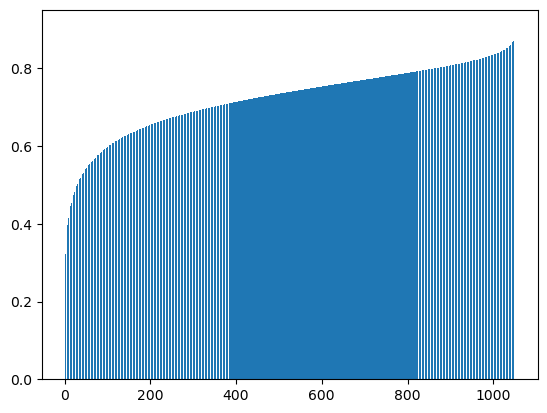

In [31]:
nll = np.array(nl).T[1]
nll /= nll.max()
nll -= nll.min()
nll *= -1
nll += 1
plt.bar(np.arange(len(nll[::170])),np.array(nll)[::-170])

In [32]:
#similarity list
sl = np.array(nl).T[0].astype(int)
#smiled faces similarity list
sfls = sl[ff2[:len(nl)][sl][:,31]==1]
sfls

array([    13,  45251, 157025, ..., 101165, 102003,  15502])

In [40]:
data_path = '~/data/data/celeba/train_celeba'
dim = [64,2]
transform = transforms.Compose([transforms.ToTensor(),                                
                                transforms.Normalize(mean=[0.5], std=[0.5]),
                                transforms.Resize(size=[218//dim[1], 178//dim[1]]),
                                transforms.CenterCrop((dim[0],dim[0]))])

dataset = ImageFolder(data_path, transform)
test_loader = DataLoader(dataset=dataset,
                        batch_size=128,
                        num_workers=4,
                        sampler=sfls
                        )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

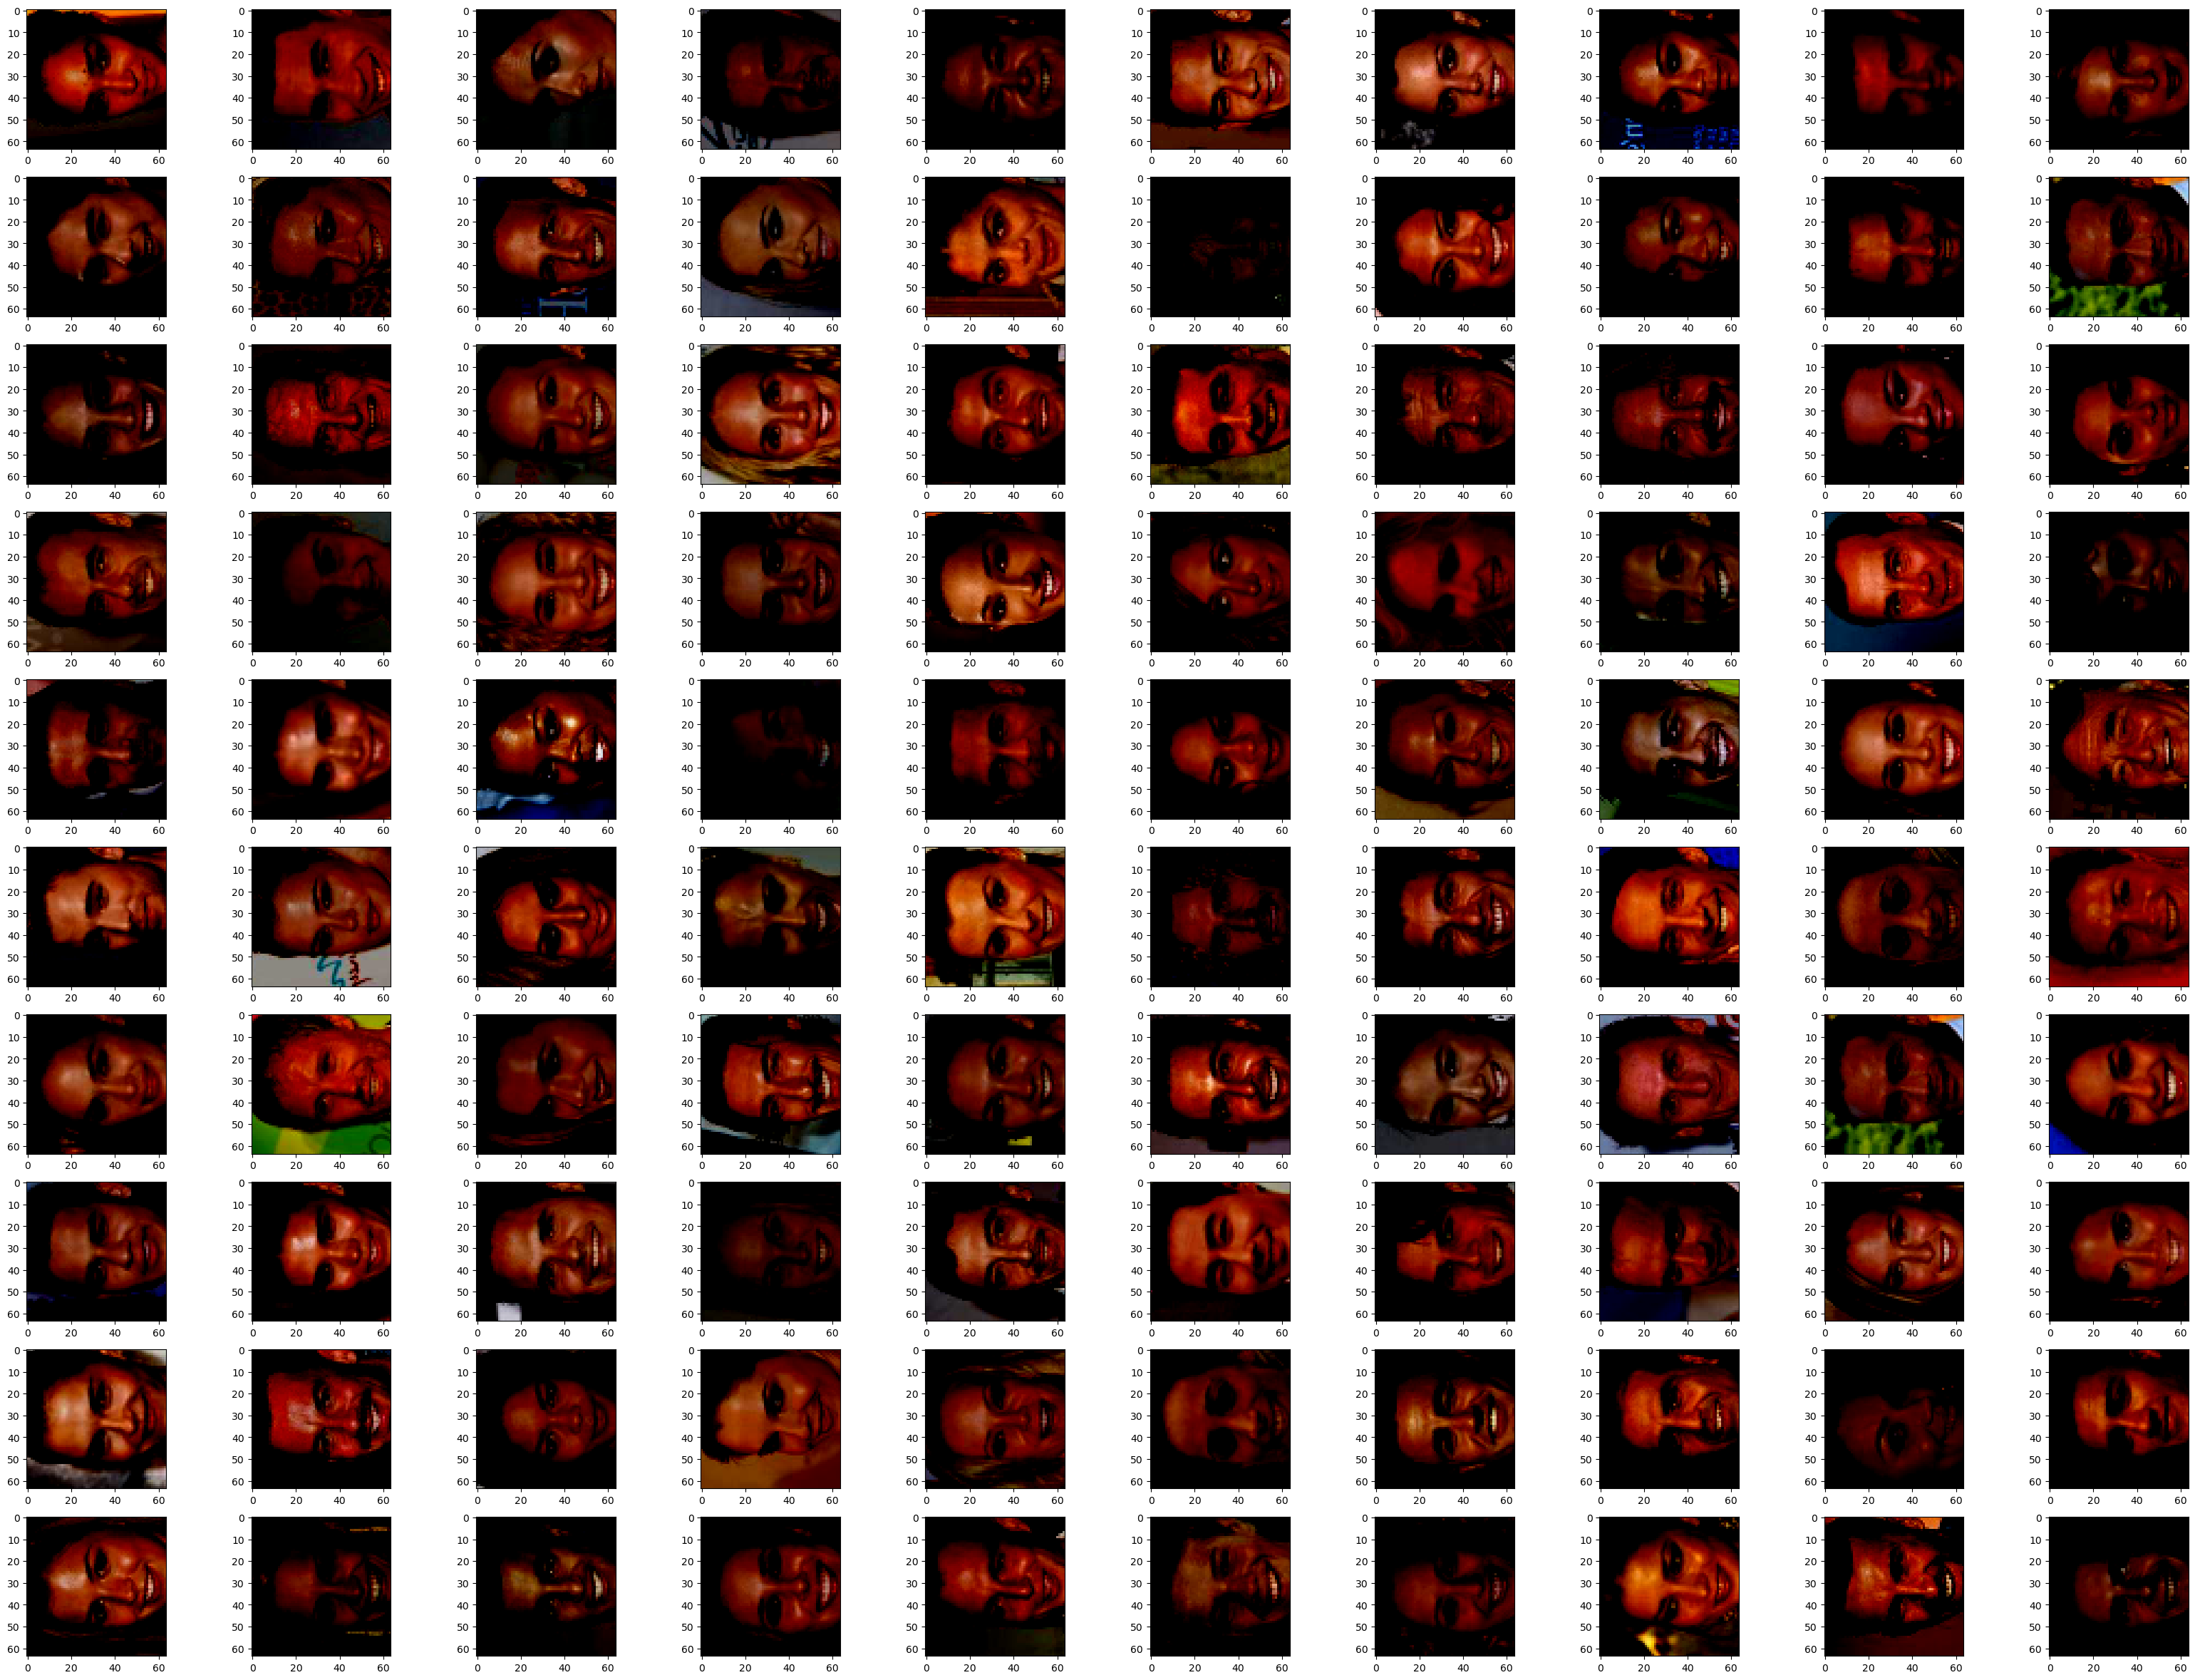

In [41]:
fig, ax  = plt.subplots(10,10, figsize=(40,30))
img = next(iter(test_loader))[0]
for i in range(10):
    for j in range(10):
        ax[i,j].imshow(img[i+10*j].numpy().T)


In [53]:
c = nn.Conv1d(1,10,1)
c(torch.randn(3,1,1)).size()

torch.Size([3, 10, 1])

In [35]:
def weighted_avg_faces(train_loader, labels,labels1, weight=None, img=None):    

    x1 = torch.zeros((next(iter(train_loader))[0].size()[1:]))
    x2 = torch.zeros((next(iter(train_loader))[0].size()[1:]))
    for batch_idx, (features, _) in enumerate(train_loader):
        print(batch_idx)
        
        lbl = labels[batch_idx*features.size(0):(batch_idx+1)*features.size(0)]
        lbl1 = labels1[batch_idx*features.size(0):(batch_idx+1)*features.size(0)]
        wg = weight[batch_idx*features.size(0):(batch_idx+1)*features.size(0)]
        
        temp=features[(lbl==1)*lbl1]
        if len(temp)!=0:
            temp*=wg[(lbl==1)*lbl1].reshape(1,1,1,-1).T
            x1+=temp.sum(axis=0)
            # x1/=len(temp)
        
        temp=features[(lbl!=1)*lbl1]
        if len(temp)!=0:
            temp*=wg[(lbl!=1)*lbl1].reshape(1,1,1,-1).T
            x2+=temp.sum(axis=0)
            # x2/=len(temp)
        

    return x1,x2

In [36]:
x1,x2 = weighted_avg_faces(train_loader=train_loader, labels=np.array(ff2[:,31]), labels1= (f<151), weight=nll)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [37]:
l1 = sum(nll[(np.array(ff2[:,31][:len(f)])==1)*(f<151)])
l2 = sum(nll[(np.array(ff2[:,31][:len(f)])!=1)*(f<151)])
l1,l2

(12609.209178423593, 11380.79200844445)

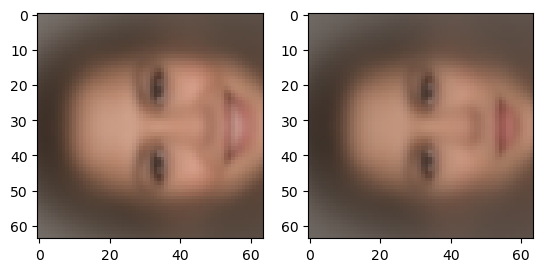

In [38]:
fig, ax = plt.subplots(1,2)
ax[0].imshow((x1/l1).numpy().T)
ax[1].imshow((x2/l2).numpy().T)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


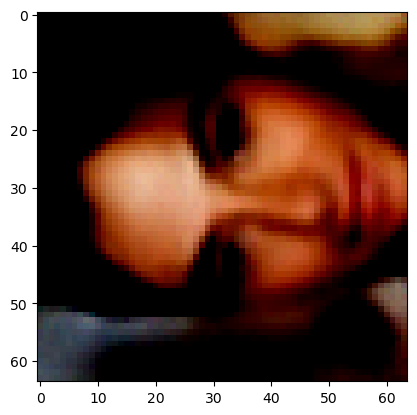

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


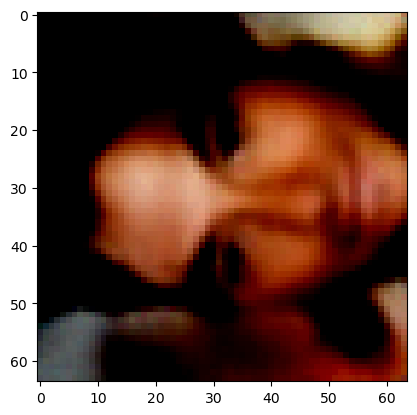

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


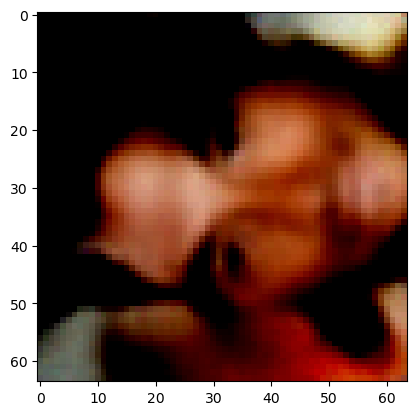

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


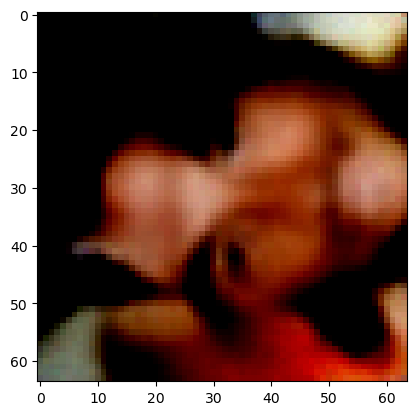

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


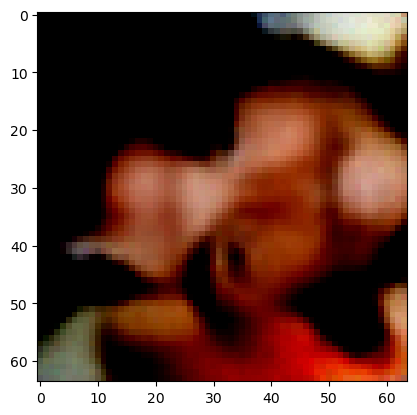

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


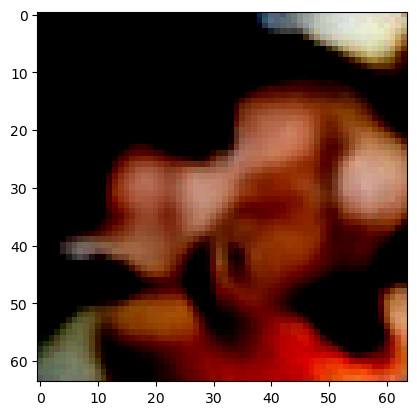

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


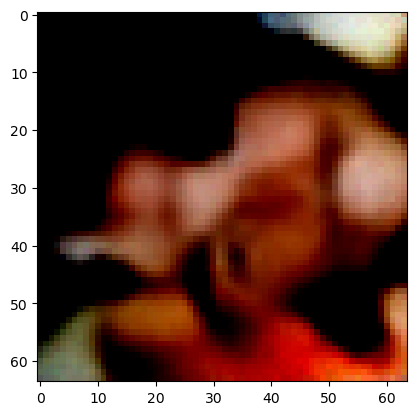

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


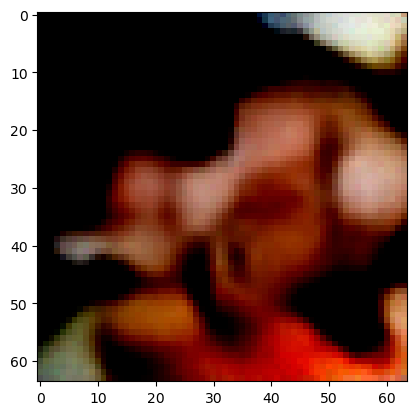

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


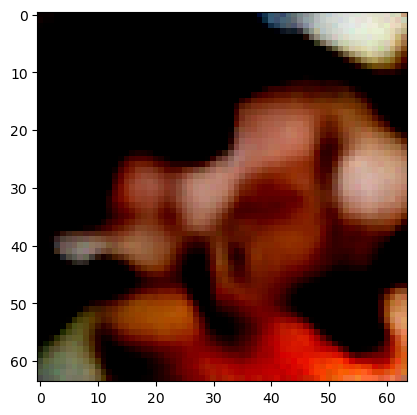

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


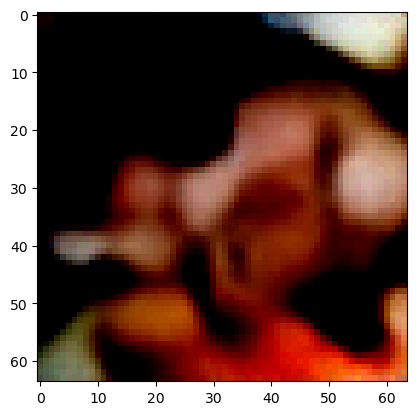

tensor([ 1.2648e+01,  1.3891e+01,  1.3200e+01,  7.9846e+00,  7.6970e+00,
         7.8425e+00,  8.0951e+00,  5.3279e+00,  7.0797e+00,  7.5963e+00,
         7.9625e+00,  6.0465e+00,  7.1033e+00,  7.7903e+00,  5.7404e+00,
         4.7238e+00,  6.0587e+00,  5.3102e+00,  4.8169e+00,  4.1824e+00,
         6.5285e+00,  3.5466e+00,  2.6839e+00,  3.5407e+00,  3.8099e+00,
         2.8503e+00,  4.4404e+00,  3.3430e+00,  2.3513e+00,  3.7576e+00,
         3.4687e+00, -6.0942e-01,  1.7478e+00,  1.8740e+00,  1.2839e+00,
         1.3067e+00,  4.9245e-03,  7.0008e-01, -2.5622e+00,  6.9473e-01,
         8.7770e-01,  3.1848e-01, -1.0775e+00, -6.5762e-01,  8.9468e-01,
         1.1601e+00,  1.3386e-01, -8.1144e-01, -2.1146e+00, -3.0025e+00,
        -3.1856e+00,  2.8161e-01, -1.3381e+00, -4.0829e+00, -1.6522e+00,
        -9.2087e-01, -1.0935e+00,  1.8290e-01, -1.0714e+00, -1.9179e+00,
        -3.1433e+00, -1.7708e+00,  1.0743e-01, -1.6929e+00, -1.7482e+00,
        -3.2769e+00,  3.1337e-01, -1.3222e+00,  9.1

In [39]:
# x = torch.tensor(emb[:128]).view(128,100,1,1)
model = VAE3().type(torch.float64)
model.load_state_dict(torch.load('./vae321_fat_14e.pt'))
xx = torch.tensor(emb[13].reshape(1,100,1,1))
temp = model.decoder(xx)[0].detach().numpy().T

for i in range(10):
    xx = xx-2*diff.resize(1,100,1,1)
    plt.imshow(model.decoder(xx)[0].detach().numpy().T)
    plt.show()

print(xx.reshape(-1))